##  M6 - W4 Assignment: Unsupervised Learning
#### Luke Barry

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

***

### Download, load and clean the data.

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# converting object types with LabelEncoder
le = LabelEncoder()
train_conv = train.drop('ID', axis=1)
catcolumn = train_conv.loc[:, train_conv.dtypes == np.object]
for i in catcolumn:
    train_conv[i] = le.fit_transform(train[i])
train_conv.iloc[:, :10]

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10
0,130.81,32,23,17,0,3,24,9,14,0
1,88.53,32,21,19,4,3,28,11,14,0
2,76.26,20,24,34,2,3,27,9,23,0
3,80.62,20,21,34,5,3,27,11,4,0
4,78.02,20,23,34,5,3,12,3,13,0
...,...,...,...,...,...,...,...,...,...,...
4204,107.39,8,20,16,2,3,0,3,16,0
4205,108.77,31,16,40,3,3,0,7,7,0
4206,109.22,8,23,38,0,3,0,6,4,0
4207,87.48,9,19,25,5,3,0,11,20,0


***

### Perform a principle component analysis (PCA). 
> How many components will you choose based on an explained variance ratio of your choice? Plot the proportion of explained variance and the number of components.

In [6]:
#PCA shape
pca = PCA().fit(train_conv)
transf = pca.transform(train_conv)
print('Original shape: {}'.format(train_conv.shape))
print('Shape of PCA array: {}'.format(transf.shape))

Original shape: (4209, 377)
Shape of PCA array: (4209, 377)


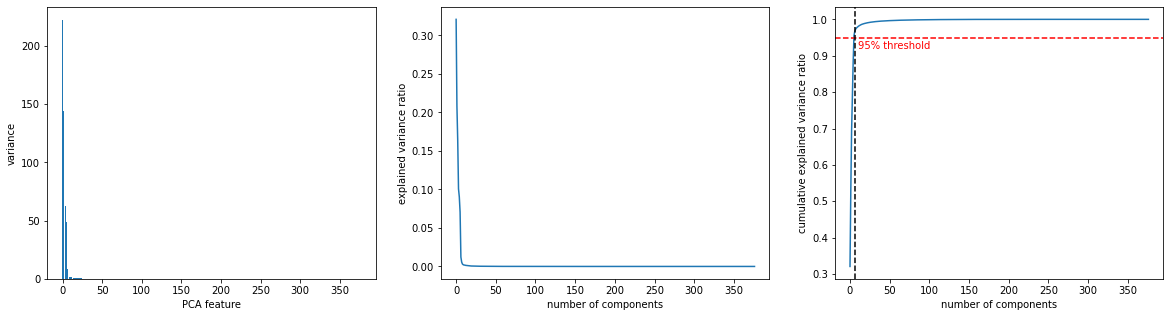

In [9]:
# Select 95% of the variance
pipe = Pipeline([('scaler', Normalizer()),
         ('reducer', PCA())])

# Fit the pipe to the data
pipe.fit_transform(train_conv)

# Figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

# Explained variances
ax1.bar(range(pca.n_components_), pca.explained_variance_)
ax1.set(xlabel='PCA feature', ylabel='variance')

# Explained variance ratio.
ax2.plot(pca.explained_variance_ratio_)
ax2.set(xlabel='number of components', ylabel='explained variance ratio')

# Cumulative explained variance ratio.
ax3.plot(np.cumsum(pca.explained_variance_ratio_))
ax3.set(xlabel='number of components', ylabel='cumulative explained variance ratio')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=6, color='black', linestyle='--')
plt.text(10, 0.92, '95% threshold', color = 'red', fontsize=10)
plt.show()


In [8]:
# Select 95% of the variance
pipe = Pipeline([('scaler', Normalizer()),
         ('reducer', PCA(n_components=.95))])

# Fit the pipe to the data
pipe.fit_transform(train_conv)

#print
print('{} components selected'.format(len(pipe.steps[1][1].components_)))

6 components selected


> Judging by the cumulative explained variance ratio, around 95% is a good point since the variance appears to beging dimnishing around this threshold. This will result in 6 components.

***

### Original Features
>One downside of PCA is that it maps all the original features to a lower dimensional space, resulting in less interpretable features. Let’s say we want to use the result of the PCA but still work with the original features. Here is what we can do. Using the selected number of components from 2), find which features of the original data have the highest absolute correlation with each of the components. Select features with absolute correlation with the PCA components of at least 0,75. How many and which features will you end up with?

In [10]:
# Select 95% of the variance
pipe = Pipeline([('scaler', Normalizer()),
         ('reducer', PCA(n_components=.95))])

# Fit the pipe to the data
pipe = pipe.fit_transform(train_conv)

# Create new dataframe
pc_df = pd.DataFrame(pipe, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])
pc_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
0,0.049088,-0.039416,0.069962,0.000355,-0.017953,0.000980
1,-0.023283,0.056478,0.182941,-0.031851,0.010464,0.042615
2,0.103270,0.212283,0.219031,-0.028617,0.127026,0.028025
3,0.111709,0.207016,0.163758,-0.066836,-0.063001,0.053967
4,0.116989,0.218194,0.094581,0.069880,0.032745,-0.028652


In [11]:
# feature component correlation function
def corr_feature_pca_component(original_data, pca_data, column):
    """
    This function takes in a data frame of selected number of principal components, correlated them with the original features,
    and returns a dataframe with sorted correlation between one column of the principal component table and the original features
    
    INPUT
    original data: pd.dataframe()
    pca_data: pd.dataframe() where each column is the values of each PCA component vector
    column: a PC of choice
    
    """
    corr_pc = pd.DataFrame(original_data.corrwith(pca_data[column]), columns = [column])
    corr_pc = corr_pc.abs()
    return corr_pc.sort_values(by=column, ascending=False)

In [12]:
#preparing variables for following threshold function
corr_pc1 = corr_feature_pca_component(train_conv, pc_df, 'PC 1')
corr_pc2 = corr_feature_pca_component(train_conv, pc_df, 'PC 2')
corr_pc3 = corr_feature_pca_component(train_conv, pc_df, 'PC 3')
corr_pc4 = corr_feature_pca_component(train_conv, pc_df, 'PC 4')
corr_pc5 = corr_feature_pca_component(train_conv, pc_df, 'PC 5')
corr_pc6 = corr_feature_pca_component(train_conv, pc_df, 'PC 6')

In [13]:
# Correlation threshold function
def is_corr_above_threshold(data, column, corr_values=[0.75]):
    """
    This function takes in the data set with sorted correlation values, and a list of correlation values and return a data set with binary
    columns, where the new columns = 1 if the corr is above a specified threshold and 0 otherwise. 
    
    #####
    INPUT:
    
    data: pd.dataframe() of one of the datasets above, which contain the absolute values of correlation between principal components and original
    features
    
    column: the respective column of the data set (principle component 1, 2, etc.)
    corr_values : a list of correlation values to consider
    
    #####
    RETURNS:
    
    data: pd.dataframe(), which is the original data + extra binary columns as specified above 
    
    """
    for i in corr_values: 
        threshold = []
        
        for value in data[column]:
            if value >= i:
                threshold.append(1)
            else:
                threshold.append(0)
        data['threshold'] = threshold
    return data

In [67]:
# running components through the threshold function
pc1 = is_corr_above_threshold(corr_pc1, 'PC 1')[is_corr_above_threshold(corr_pc1, 'PC 1')['threshold'] == 1].reset_index()
pc2 = is_corr_above_threshold(corr_pc2, 'PC 2')[is_corr_above_threshold(corr_pc2, 'PC 2')['threshold'] == 1].reset_index()
pc3 = is_corr_above_threshold(corr_pc3, 'PC 3')[is_corr_above_threshold(corr_pc3, 'PC 3')['threshold'] == 1].reset_index()
pc4 = is_corr_above_threshold(corr_pc4, 'PC 4')[is_corr_above_threshold(corr_pc4, 'PC 4')['threshold'] == 1].reset_index()
pc5 = is_corr_above_threshold(corr_pc5, 'PC 5')[is_corr_above_threshold(corr_pc5, 'PC 5')['threshold'] == 1].reset_index()
pc6 = is_corr_above_threshold(corr_pc6, 'PC 6')[is_corr_above_threshold(corr_pc6, 'PC 6')['threshold'] == 1].reset_index()
pc1

In [16]:
#isolate features based in 75% threshold
features = []
for i in [pc1, pc2, pc3, pc4, pc5, pc6]:
    for c in i['index']:
        features.append(c)
        
print('Features to keep: ')
for f in features:
    print(f)

Features to keep: 
X0
X2
X8
X6


>There are **4** original features with at least a 75% correlation value with the principal compenents: **X0, X2, X8, and X6**

***

### Inspecting Final Features
>Out of curiosity, I wanted to inspect the columns that were correlated further. The heatmap also serves as further evidence that the four mentioned features are correlated to the compnents. It appears PC 1 and X2 are somewhat correlated, but below the threshold. The PC 1/ X2 relationship are also much less apparent in the pairplots than the other examples.

<AxesSubplot:>

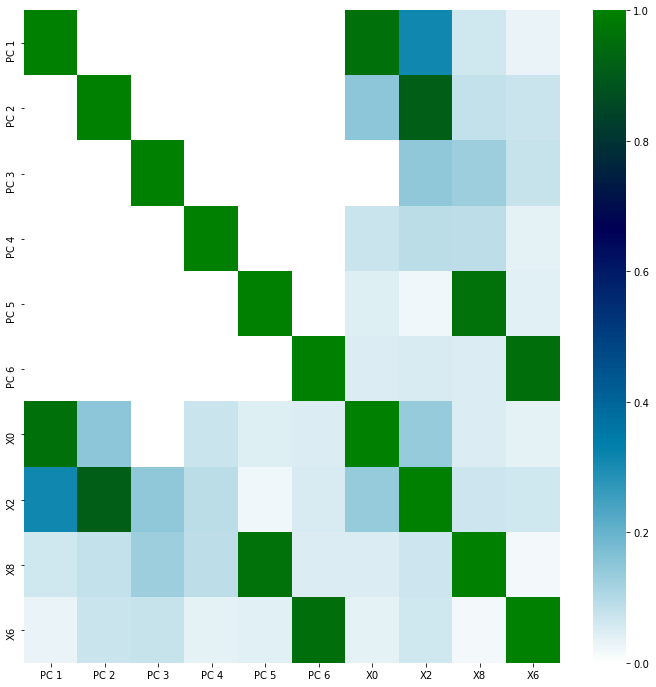

In [25]:
#append features to pc dataframe and create heatmap
for i in features:
    pc_df[i] = train_conv[i]

# Heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(pd.DataFrame(pc_df).corr().abs(), cmap="ocean_r")

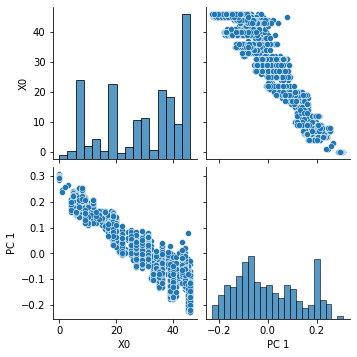

In [62]:
sns.pairplot(pc_df[['X0', 'PC 1']])
plt.show()

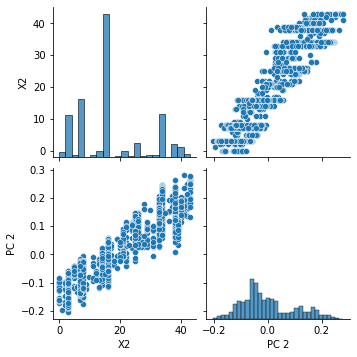

In [63]:
sns.pairplot(pc_df[['X2', 'PC 2']])
plt.show()

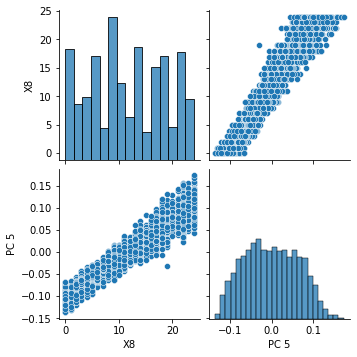

In [64]:
sns.pairplot(pc_df[['X8', 'PC 5']])
plt.show()

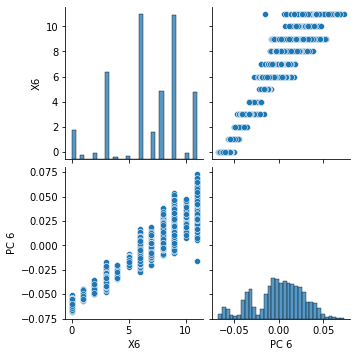

In [65]:
sns.pairplot(pc_df[['X6', 'PC 6']])
plt.show()

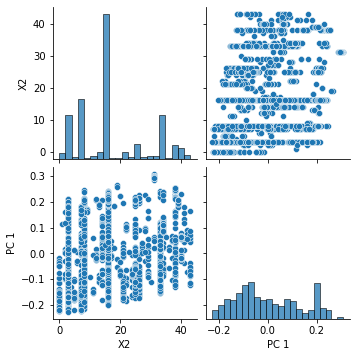

In [66]:
sns.pairplot(pc_df[['X2', 'PC 1']])
plt.show()